<a href="https://colab.research.google.com/github/ArvindMankotia2004/ML/blob/main/Loan_approval_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

arvindmankotia_loan_knn_path = kagglehub.dataset_download('arvindmankotia/loan-knn')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-knn/Loan.csv


In [ ]:
data=pd.read_csv('/kaggle/input/loan-knn/Loan.csv')

In [ ]:
data

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as plx
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
for i in data.columns:
    print(i, ':' , data[i].nunique())

ApplicationDate : 20000
Age : 63
AnnualIncome : 17516
CreditScore : 322
EmploymentStatus : 3
EducationLevel : 5
Experience : 62
LoanAmount : 15578
LoanDuration : 10
MaritalStatus : 4
NumberOfDependents : 6
HomeOwnershipStatus : 4
MonthlyDebtPayments : 1299
CreditCardUtilizationRate : 20000
NumberOfOpenCreditLines : 14
NumberOfCreditInquiries : 8
DebtToIncomeRatio : 20000
BankruptcyHistory : 2
LoanPurpose : 5
PreviousLoanDefaults : 2
PaymentHistory : 38
LengthOfCreditHistory : 29
SavingsAccountBalance : 9199
CheckingAccountBalance : 5151
TotalAssets : 18814
TotalLiabilities : 17163
MonthlyIncome : 17489
UtilityBillsPaymentHistory : 20000
JobTenure : 17
NetWorth : 17724
BaseInterestRate : 18742
InterestRate : 19999
MonthlyLoanPayment : 20000
TotalDebtToIncomeRatio : 20000
LoanApproved : 2
RiskScore : 73


In [ ]:
data.isnull().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

In [ ]:
data['ApplicationDate']=pd.to_datetime(data['ApplicationDate'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ApplicationDate             20000 non-null  datetime64[ns]
 1   Age                         20000 non-null  int64         
 2   AnnualIncome                20000 non-null  int64         
 3   CreditScore                 20000 non-null  int64         
 4   EmploymentStatus            20000 non-null  object        
 5   EducationLevel              20000 non-null  object        
 6   Experience                  20000 non-null  int64         
 7   LoanAmount                  20000 non-null  int64         
 8   LoanDuration                20000 non-null  int64         
 9   MaritalStatus               20000 non-null  object        
 10  NumberOfDependents          20000 non-null  int64         
 11  HomeOwnershipStatus         20000 non-null  object    

<Axes: xlabel='LoanApproved', ylabel='count'>

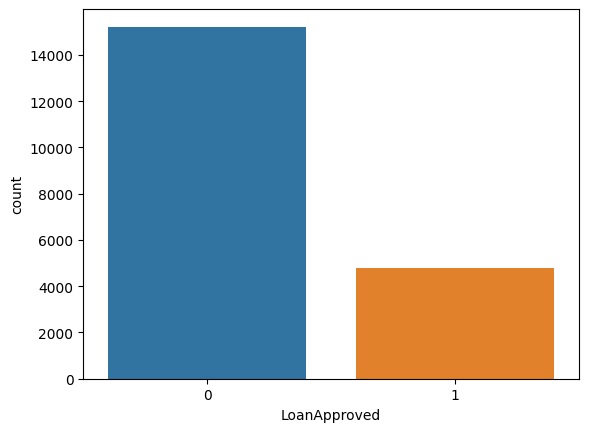

In [ ]:
sns.countplot(data=data,x='LoanApproved')

In [ ]:
data['LoanApproved'].value_counts()

LoanApproved
0    15220
1     4780
Name: count, dtype: int64

In [ ]:
numerical_df = data.select_dtypes(include=['number'])
numerical_df.columns

Index(['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount',
       'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets',
       'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory',
       'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate',
       'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved',
       'RiskScore'],
      dtype='object')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='Age', ylabel='Count'>

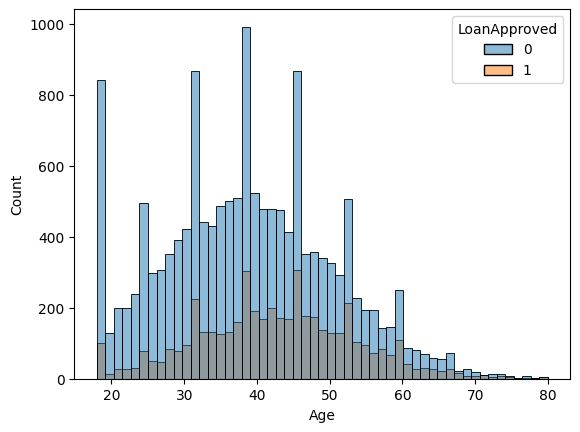

In [ ]:
sns.histplot(data=data,x='Age', hue='LoanApproved')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='AnnualIncome', ylabel='Count'>

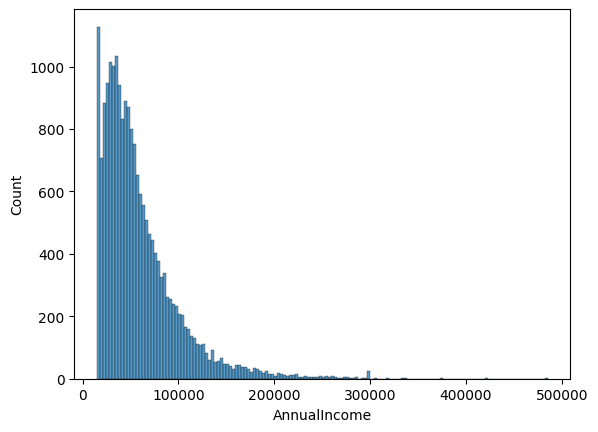

In [ ]:
sns.histplot(data=data,x='AnnualIncome')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='CreditScore', ylabel='Count'>

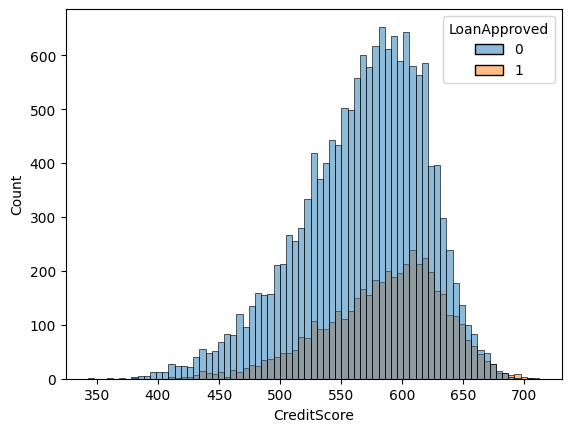

In [ ]:
sns.histplot(data=data,x='CreditScore', hue='LoanApproved')

In [ ]:
categorical = data.select_dtypes(include=['object'])
categorical.columns

Index(['EmploymentStatus', 'EducationLevel', 'MaritalStatus',
       'HomeOwnershipStatus', 'LoanPurpose'],
      dtype='object')

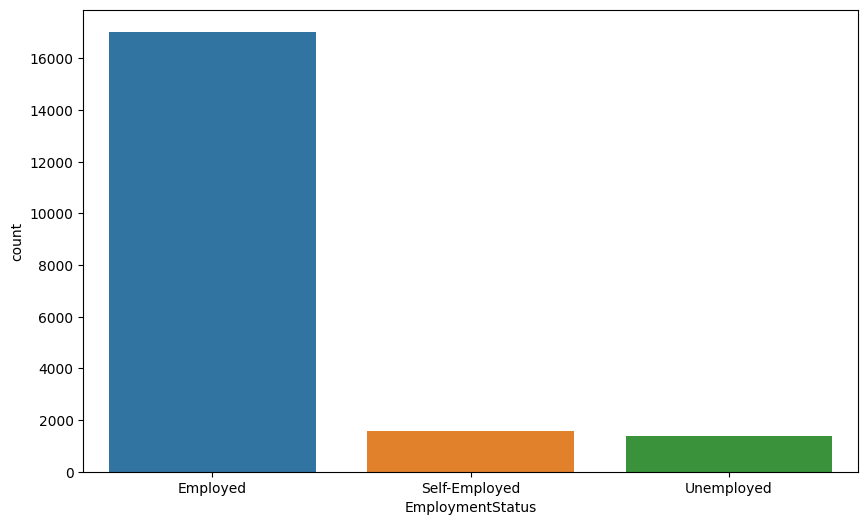

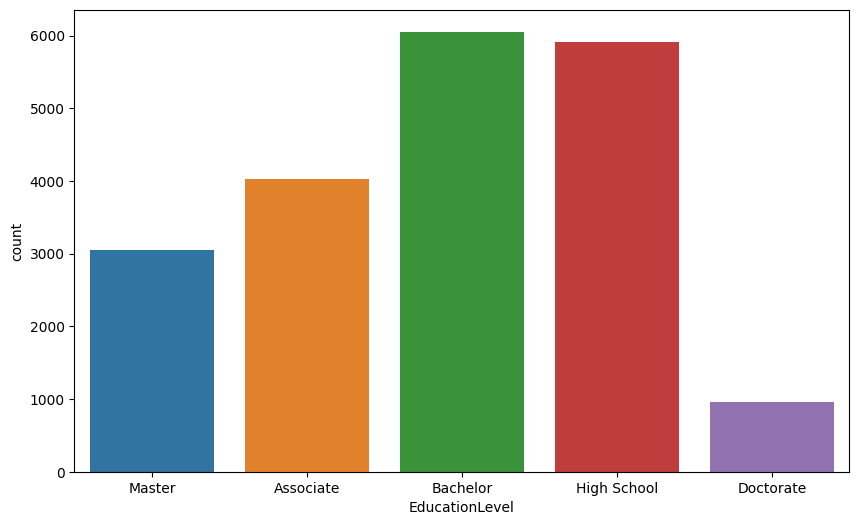

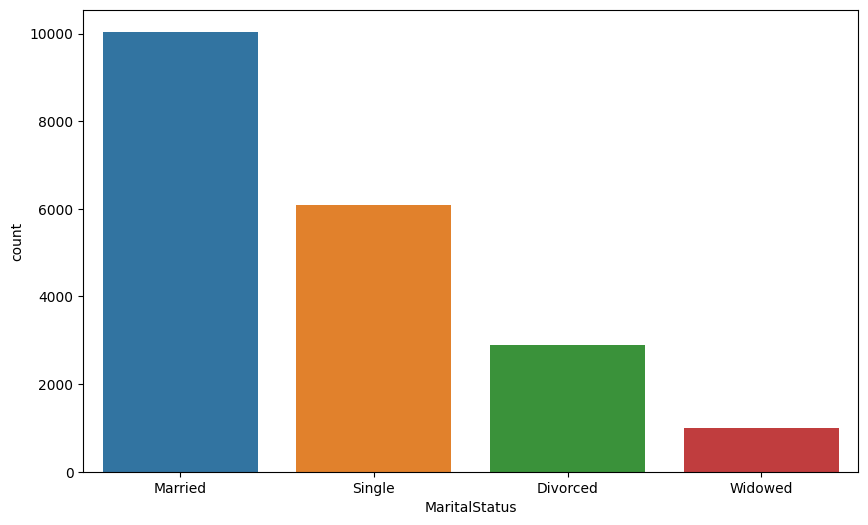

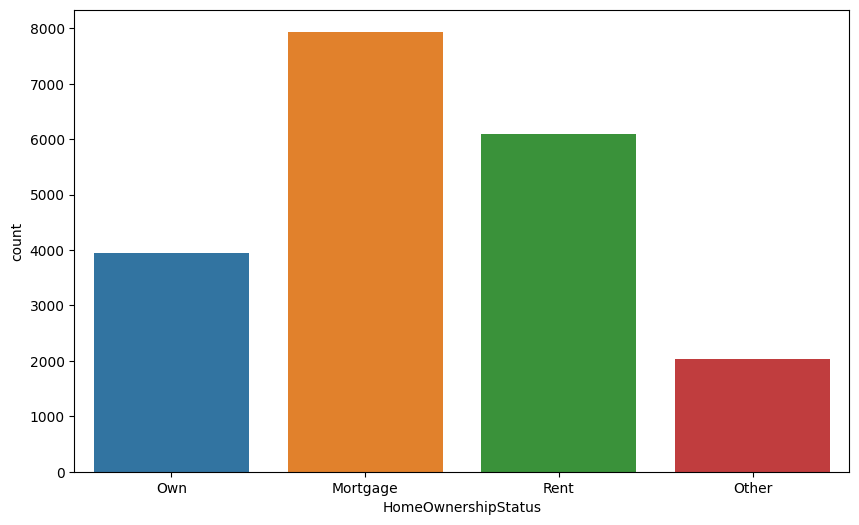

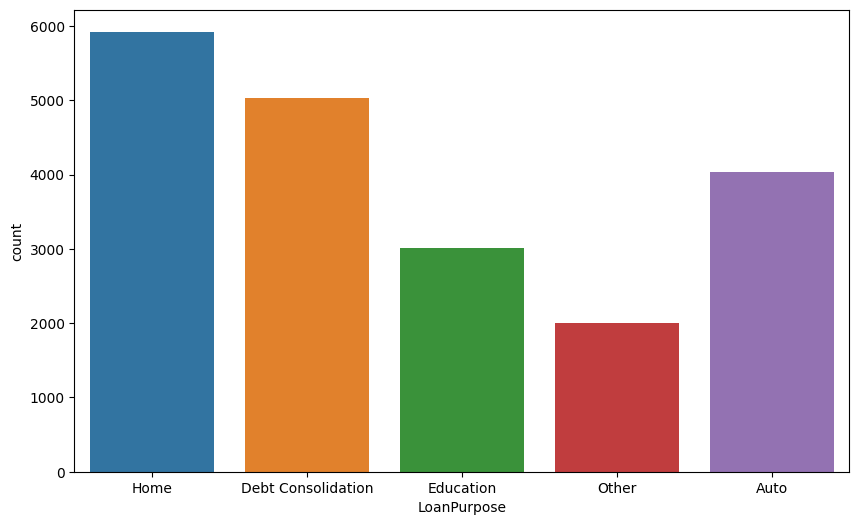

In [ ]:
for feature in categorical:
    plt.figure(figsize=(10,6))
    sns.countplot(data=data,x=feature)

In [ ]:
correlation=numerical_df.corr()

In [ ]:
correlation

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
Age,1.000000,0.144774,0.323243,0.982980,-0.007492,-0.006992,-0.000287,0.015685,-0.001394,-0.001069,...,0.144634,-0.005601,-0.000773,0.014061,-0.238995,-0.202702,-0.021380,-0.111800,0.141029,-0.164304
AnnualIncome,0.144774,1.000000,0.104045,0.145999,-0.004116,0.002972,-0.001244,-0.001082,-0.007935,-0.008175,...,0.989911,-0.012351,-0.000610,-0.004358,-0.074549,-0.063832,-0.004304,-0.532033,0.597900,-0.483289
CreditScore,0.323243,0.104045,1.000000,0.327664,-0.010834,-0.000762,-0.014453,0.011153,-0.009650,-0.008780,...,0.104796,-0.006838,0.008069,0.001951,-0.722619,-0.598844,-0.063932,-0.115363,0.142000,-0.240198
Experience,0.982980,0.145999,0.327664,1.000000,-0.007921,-0.007924,0.000136,0.018629,-0.001751,-0.002143,...,0.145950,-0.006603,-0.000762,0.015049,-0.242871,-0.206252,-0.021691,-0.112825,0.140755,-0.166496
LoanAmount,-0.007492,-0.004116,-0.010834,-0.007921,1.000000,-0.000436,-0.007005,0.021103,0.000806,0.000769,...,-0.005407,-0.012107,0.005364,-0.003679,0.385663,0.322824,0.780828,0.457175,-0.239496,0.137981
LoanDuration,-0.006992,0.002972,-0.000762,-0.007924,-0.000436,1.000000,-0.001301,0.000068,-0.006160,0.001489,...,0.003067,-0.010105,0.003635,-0.008779,0.579215,0.487994,-0.385495,-0.213984,-0.094558,0.054550
NumberOfDependents,-0.000287,-0.001244,-0.014453,0.000136,-0.007005,-0.001301,1.000000,-0.002396,0.011544,0.006033,...,-0.000414,0.008735,0.010910,-0.008423,0.006977,0.006749,-0.001390,-0.000358,0.001717,0.001686
MonthlyDebtPayments,0.015685,-0.001082,0.011153,0.018629,0.021103,0.000068,-0.002396,1.000000,0.005420,0.006280,...,-0.000356,0.001638,0.005863,0.004430,0.000010,0.003895,0.018021,0.219453,-0.070415,0.036938
CreditCardUtilizationRate,-0.001394,-0.007935,-0.009650,-0.001751,0.000806,-0.006160,0.011544,0.005420,1.000000,0.001491,...,-0.009381,0.013040,-0.006979,-0.003506,0.003668,0.001030,0.004366,0.010490,-0.010466,0.108758
NumberOfOpenCreditLines,-0.001069,-0.008175,-0.008780,-0.002143,0.000769,0.001489,0.006033,0.006280,0.001491,1.000000,...,-0.008050,-0.010497,0.007298,-0.002013,0.007457,0.008090,-0.005058,0.003471,-0.004769,0.007762


<Axes: >

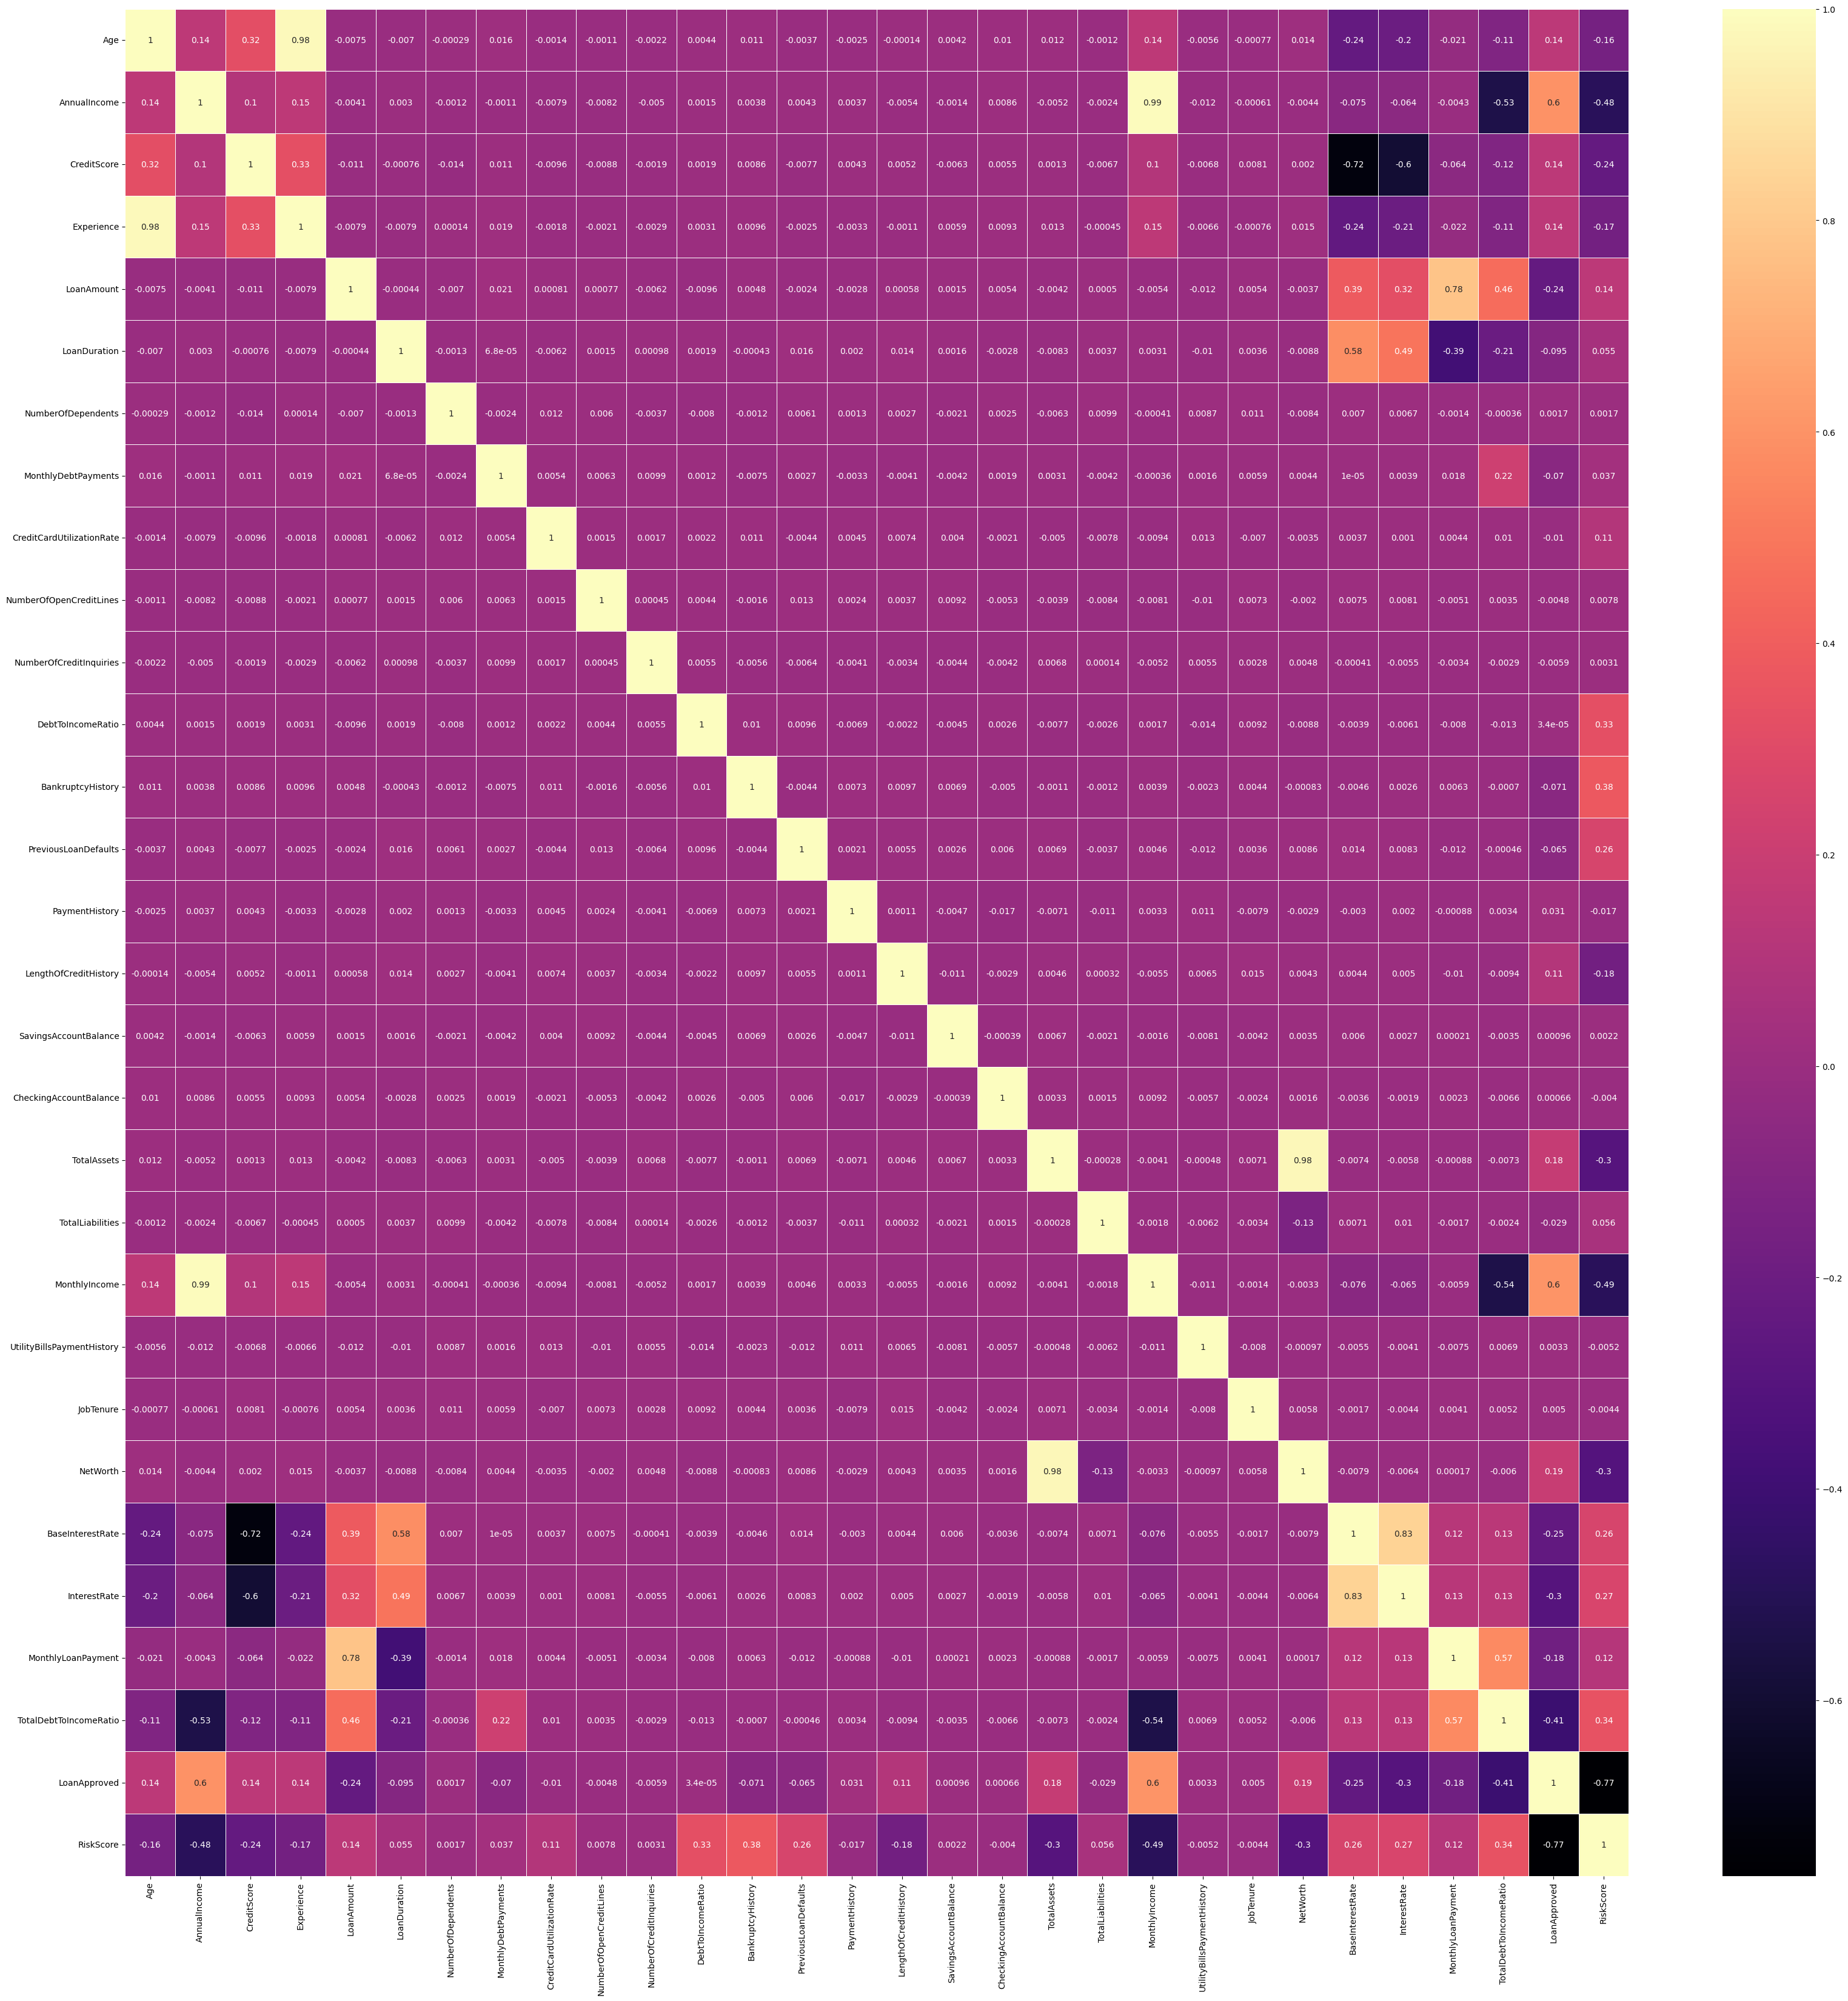

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(correlation, annot=True, cmap='magma', linewidths=0.5)

In [ ]:
import plotly.express as plx

fig = plx.scatter(
    data_frame=data,
    x='CreditScore',
    y='LoanAmount',
    color='EmploymentStatus'
)
fig.update_layout(height=600)
fig.show()


In [ ]:
for col in categorical:
    fig=plx.pie(data,names=col,hole=0.3)
    fig.update_traces(textposition='inside')
    fig.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder


In [ ]:
encoder=LabelEncoder()
for i in categorical:
    data[i]=encoder.fit_transform(data[i])

In [ ]:
X=data.drop(['ApplicationDate','LoanApproved'],axis=1)
y=data['LoanApproved']

In [ ]:
!pip install -U scikit-learn==1.3.2 imbalanced-learn==0.11.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 104.0 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 17.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
